In [1]:
import numpy as np
from autograd.tensor import Tensor, Parameter
from nn.optimizer import SGD
from nn.module import Module

In [2]:
x_data = Tensor(np.random.randn(100, 3))
coef = Tensor(np.array([-1, +3, -2]))
y_data = x_data @ coef + Tensor(5)

In [3]:
class Model(Module):
    def __init__(self) -> None:
        self.w = Parameter(3)
        self.b = Parameter()

    def predict(self, inputs: Tensor) -> Tensor:
        return inputs @ self.w + self.b

optimizer = SGD(lr=0.001)
batch_size = 32
model = Model()

In [4]:
loss_list = []

for epoch in range(30):
    epoch_loss = 0.0

    for start in range(0, 100, batch_size):
        end = start + batch_size

        model.zero_grad()

        inputs = x_data[start:end]

        predicted = model.predict(inputs)
        actual = y_data[start:end]
        errors = predicted - actual
        loss = (errors * errors).sum()

        loss.backward()
        epoch_loss += loss.data

        optimizer.step(model)

    loss_list.append(epoch_loss)

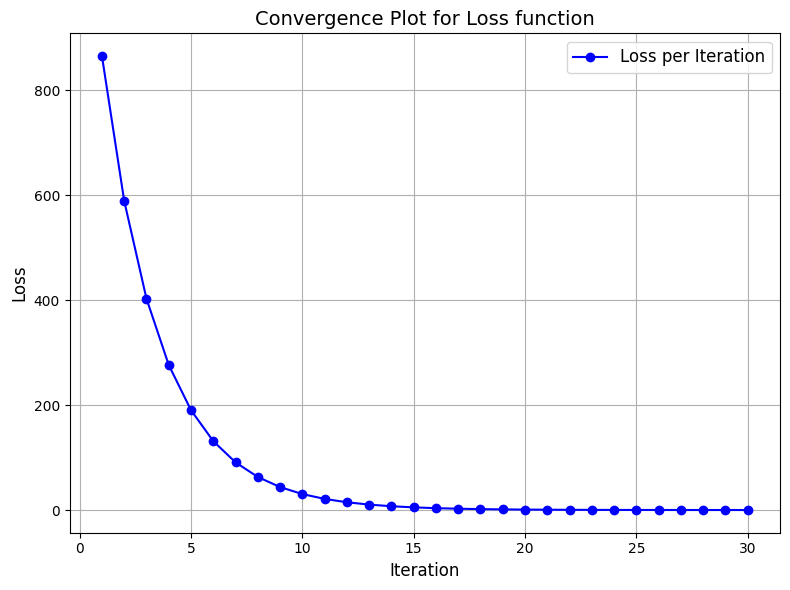

In [5]:
import matplotlib.pyplot as plt

# Plotting the loss convergence
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_list) + 1), loss_list, marker='o', linestyle='-', color='b', label="Loss per Iteration")
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Convergence Plot for Loss function", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Prediction using the model

In [9]:
x = Tensor(np.random.randn(100, 3))
y_actual = x @ coef + Tensor(5)
y_pred = model.predict(x)

In [13]:
overall_diff = ((y_actual.data - y_pred.data)**2).sum()
print(overall_diff)

0.020047465994554002
